# **Batch Gradient Descent**

3 types of gradient descent:

1. Batch gradient descent
    - Use the entire dataset to calculate the gradient
    - More stable but slower
2. Stochastic gradient descent
    - Use one sample at a time to calculate the gradient
    - Faster but less stable
3. Mini-batch gradient descent
    - Use a small subset of the dataset to calculate the gradient
    - Faster than batch but more stable than stochastic


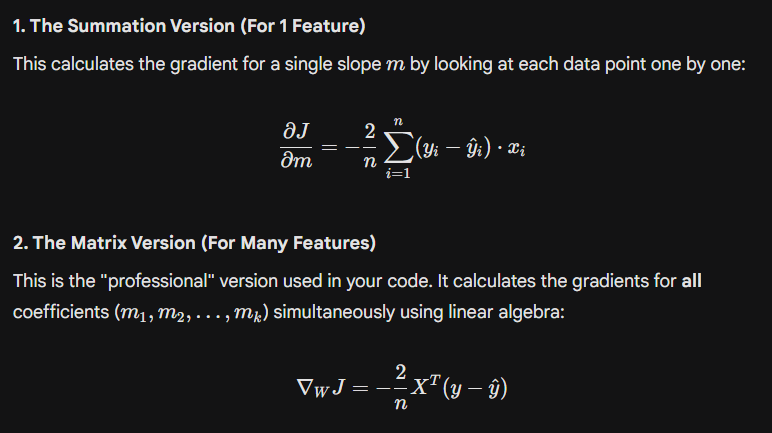

# Batch Gradient Descent

Batch Gradient Descent is an optimization algorithm used to minimize the cost function by calculating the gradient of the cost function with respect to the parameters for the entire training dataset.


The cost function $J(\theta)$ is defined as:
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

The gradient of the cost function with respect to each parameter $\theta_j$ is:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In vector notation:
$$\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)$$



$$\theta := \theta - \alpha \nabla_\theta J(\theta)$$

Where:
- $\alpha$ is the learning rate.
- $m$ is the number of training examples.
- $X$ is the feature matrix.
- $y$ is the target vector.
- $h_\theta(x)$ is the hypothesis function, which represents the predicted value for a given input $x$.

theta represents the vector of parameters (weights) that the model learns.
It defines the hypothesis function: $h_\theta(x) = \theta_0 + \theta_1*x_1 + ... + \theta_n*x_n$
In vector notation, the prediction is calculated as: $h_\theta(X) = X @ \theta$




---
---
---

# **Derivation of the Matrix Gradient for Linear Regression**

To derive the formula $\frac{2}{n} X^T (\hat{y} - y)$, we start with the definition of the Cost Function in matrix form and apply the rules of Matrix Calculus.

**1. Defining the Variables in Matrix Form**

In multiple linear regression, we represent our data as matrices:

- $X$: The input matrix of size $(n \times k)$, where $n$ is the number of samples and $k$ is the number of features.
- $w$: The weight vector of size $(k \times 1)$.
- $y$: The actual target vector of size $(n \times 1)$.
- $\hat{y}$: The prediction vector, calculated as $\hat{y} = Xw$.

**The Cost Function (MSE)**

The Mean Squared Error is the average of the squared differences. In matrix notation, the "squared sum" is the squared norm of the error vector:

$$J(w) = \frac{1}{n} \|Xw - y\|^2$$

Using the property $\|a\|^2 = a^T a$, we can expand this:


$$J(w) = \frac{1}{n} (Xw - y)^T (Xw - y)$$


Using the distributive property of transpose $(A - B)^T = A^T - B^T$:


$$J(w) = \frac{1}{n} ( (Xw)^T - y^T ) (Xw - y)$$

$$J(w) = \frac{1}{n} ( (w^T X^T - y^T) (Xw - y) )$$

Now, we multiply the terms:


$$J(w) = \frac{1}{n} ( w^T X^T X w - w^T X^T y - y^T X w + y^T y )$$

Note: Since $w^T X^T y$ is a scalar (a single number), it is equal to its own transpose $(w^T X^T y)^T = y^T X w$. We can combine the middle two terms:

$$J(w) = \frac{1}{n} ( w^T X^T X w - 2w^T X^T y + y^T y )$$


We now take the partial derivative with respect to the vector $w$, denoted as $\nabla_w J(w)$. We use three standard rules of Matrix Calculus:

$\frac{\partial}{\partial w} (w^T A w) = 2Aw$ (for symmetric $A$)

$\frac{\partial}{\partial w} (w^T A) = A$

The derivative of a constant ($y^T y$) is 0.

Applying these to our terms:

$\frac{\partial}{\partial w} (w^T (X^T X) w) = 2 X^T X w$

$\frac{\partial}{\partial w} (-2 w^T X^T y) = -2 X^T y$

Combine them back:


$$\nabla_w J(w) = \frac{1}{n} ( 2 X^T X w - 2 X^T y )$$


Factor out the $\frac{2}{n}$ and the $X^T$:


$$\nabla_w J(w) = \frac{2}{n} X^T (X w - y)$$

Since $Xw = \hat{y}$ (our prediction), we get the formula from your image:


$$\nabla_w J(w) = \frac{2}{n} X^T (\hat{y} - y)$$

Why use this version?



---
---
---

# Batch Gradient Descent for Multiple Features
In multiple linear regression, we have multiple input features ($X$) and we want to predict a target ($y$). The model learns a coefficient vector ($m$) corresponding to the features and a single intercept ($b$).

## 1. The Hypothesis (Equation)
The prediction $\hat{y}$ is calculated as the dot product of inputs and coefficients plus the intercept:
$$ \hat{y} = m_1x_1 + m_2x_2 + \dots + m_nx_n + b $$
In vectorized form (using matrix multiplication), where $X$ is our input matrix of shape `(samples, features)` and $m$ is our coefficient vector of shape `(features, 1)`:
$$ \hat{y} = X \cdot m + b $$

## 2. The Cost Function
We use the **Mean Squared Error (MSE)** to measure how far off our predictions are from the actual values:
- $i$ refers to the $i$-th training example (or data point/row)
$$ J(m, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2 $$


## 3. The Gradient Formulas
To minimize the cost, we calculate the derivative (slope) of the cost function with respect to $m$ and $b$.

**Gradient for Coefficients ($\frac{\partial J}{\partial m}$):**
$$ \frac{\partial J}{\partial m} = \frac{2}{n} X^T \cdot (\hat{y} - y) $$
**Gradient for Intercept ($\frac{\partial J}{\partial b}$):**
$$ \frac{\partial J}{\partial b} = \frac{2}{n} \sum (\hat{y} - y) $$

## 4. The Update Rule
We update the parameters by moving them in the opposite direction of the gradient, scaled by a `learning_rate` ($\alpha$):
$$ m_{new} = m_{old} - \alpha \times \frac{\partial J}{\partial m} $$
$$ b_{new} = b_{old} - \alpha \times \frac{\partial J}{\partial b} $$




---
---
---

### Derivation of the Gradient Formula
To understand how we get $\frac{\partial J}{\partial m} = \frac{2}{n} X^T \cdot (\hat{y} - y)$, let's break it down using the Chain Rule.
#### 1. The Scalar Derivative (Single Weight)
First, we find the derivative for **one specific weight** ($m_j$) which corresponds to the $j$-th feature.
**The Cost Function:**
- Capital $J$ (The Numerator):
    - What it is: This stands for the Cost Function (or Loss Function).
    - Meaning: It represents the Total Error of your model across the entire dataset. Our goal in machine learning is always to minimize this big $J$.

- Lowercase $j$ (The Subscript in $m_j$ ):
    - What it is: This is an Index that points to a specific feature (column) in your data.
    - Meaning: If you have 3 features (columns) in your dataset, $j$ loops from 1 to 3.
    - If $j=1$: You are calculating the slope for the 1st weight ($m_1$) corresponding to the 1st feature (e.g., House Size).
    - If $j=2$: You are calculating the slope for the 2nd weight ($m_2$) corresponding to the 2nd feature (e.g., Number of Rooms).

- In machine learning notation, when you see a superscript in parentheses like $(i)$, it represents an Index (or a label), not math.
- $ \hat{y}^{(i)} $
- $\hat{y}$ (y-hat): This means the Predicted Value (what the model thinks the answer is).
- $(i)$: This refers to the $i$-th row (or student, or house) in your dataset.
- It is read as: "The prediction for the $i$-th training example."

$$ J(m, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2 $$
Using the **Chain Rule**, we take the derivative with respect to $m_j$:
$$\frac{\partial J}{\partial m_j} = \frac{1}{n} \sum_{i=1}^{n} 2(\hat{y}^{(i)} - y^{(i)}) \cdot \frac{\partial}{\partial m_j}(\hat{y}^{(i)} - y^{(i)})$$
$$\frac{\partial}{\partial m_j} (m_1x_{i1} + m_2x_{i2} + \dots + m_jx_{ij} + \dots + b - y^{(i)})$$

- The derivative of $m_jx_{ij}$ with respect to $m_j$ is $x_{ij}$.
- The derivative of all other terms ($m_1, b, y^{(i)}$) is $0$ because they are constants relative to $m_j$.

$$\frac{\partial J}{\partial m_j} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) \cdot x_{ij}$$
Since the prediction $\hat{y}^{(i)}$ is a linear combination ($m_1x_1 + \dots + m_j x_j + \dots$), the derivative with respect to $m_j$ is simply the input feature value $x_j^{(i)}$.
Substituting this back in, we get the gradient for one weight:
$$ \frac{\partial J}{\partial m_j} = \frac{2}{n} \sum_{i=1}^{n} \underbrace{(\hat{y}^{(i)} - y^{(i)})}_{\text{Error}} \cdot \underbrace{x_j^{(i)}}_{\text{Input}} $$
$$or$$
$$m_{j(new)} = m_{j(old)} - \alpha \left[ \frac{2}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})x_{ij} \right]$$
**Intuition:** The gradient for a weight is the average of the **Error** multiplied by the **Input Feature**.
---
#### 2. Vectorizing (Matrix Form)
To calculate this for **all weights simultaneously**, we utilize matrix algebra.
*   In the scalar sum $\sum (\text{Error} \times x_j)$, we are dotting the Error vector with the column of feature $j$.
*   To do this for *all* features at once, we use the full input matrix $X$.
**Dimensions Check:**
*   $X$ has shape $(n, \text{features})$.
*   $(\hat{y} - y)$ has shape $(n, 1)$.
To get a result of shape $(\text{features}, 1)$ (one gradient per weight), we must transpose $X$:
$$ \underbrace{X^T}_{(\text{features}, n)} \cdot \underbrace{(\hat{y} - y)}_{(n, 1)} = \text{Result with shape } (\text{features}, 1) $$
This matrix multiplication $X^T \cdot (\hat{y} - y)$ performs the summation $\sum (\text{Error} \times \text{Input})$ for every feature in parallel.
#### 3. Final Formula
Re-attaching the constant $\frac{2}{n}$, we arrive at the final vectorized equation:
$$ \frac{\partial J}{\partial m} = \frac{2}{n} X^T \cdot (\hat{y} - y) $$

### Steps to Derive the Gradient Formula
The transition from the **Cost Function** ($J$) to the **Gradient** ($\frac{\partial J}{\partial m_j}$) involves taking the derivative using the **Chain Rule**.
#### 1. Start with the Cost Function
We begin with the Mean Squared Error (MSE), which measures the average squared difference between predictions and actual values.
$$ J = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2 $$
#### 2. Apply the Derivative
We want to find how $J$ changes with respect to a weight $m_j$. So, we take the partial derivative:
$$ \frac{\partial J}{\partial m_j} = \frac{\partial}{\partial m_j} \left( \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2 \right) $$
Since the derivative of a sum is the sum of derivatives, we can move the derivative inside the summation:
$$ = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial}{\partial m_j} (\underbrace{\hat{y}^{(i)} - y^{(i)}}_{u})^2 $$
#### 3. Use the Power Rule (Outer Function)
Let $u = (\hat{y}^{(i)} - y^{(i)})$. The expression is essentially $u^2$.
The derivative of $u^2$ with respect to $u$ is $2u$.
$$ \frac{d}{du}(u^2) = 2u $$
So, we bring down the **2**:
$$ = \frac{1}{n} \sum_{i=1}^{n} 2(\hat{y}^{(i)} - y^{(i)}) \times \dots $$
This explains why $\frac{1}{n}$ becomes $\frac{2}{n}$.
#### 4. Use the Chain Rule (Inner Function)
Now, because $u$ is a function of $m_j$, we must multiply by the derivative of the inside term $u$ with respect to $m_j$.
$$ \text{Inner Derivative} = \frac{\partial}{\partial m_j} (\hat{y}^{(i)} - y^{(i)}) $$
Since $y^{(i)}$ is a constant (actual data), its derivative is 0. We are left with the derivative of $\hat{y}^{(i)}$.
#### 5. Combine Results
Putting it all together gives us the formula in the image:
$$ \frac{\partial J}{\partial m_j} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) \times \frac{\partial}{\partial m_j}(\hat{y}^{(i)}) $$
> **In English:** The gradient is the average of (2 * Error * Slope of Prediction).